In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [4]:
# Data loading
data = pd.read_csv("IceCreamData.csv")
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
# Check for duplicate rows
data[data.duplicated()]  # No duplicate rows

,Temperature,Revenue


In [6]:
# Check for missing values
data.describe()  # No missing data

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
# Check data types
data.dtypes

Temperature    float64
Revenue        float64
dtype: object

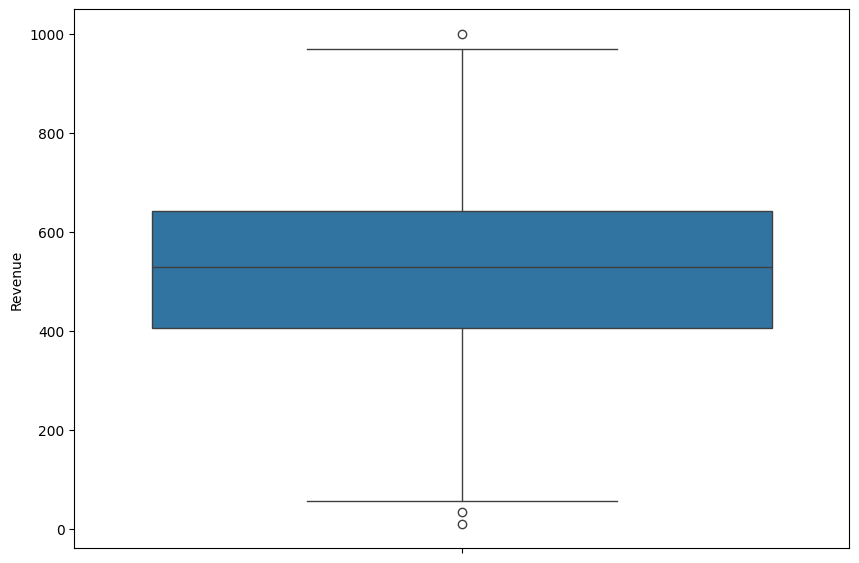

In [8]:
# Outlier detection
plt.figure(figsize=(10,7))
sns.boxplot(data=data["Revenue"])
plt.show()

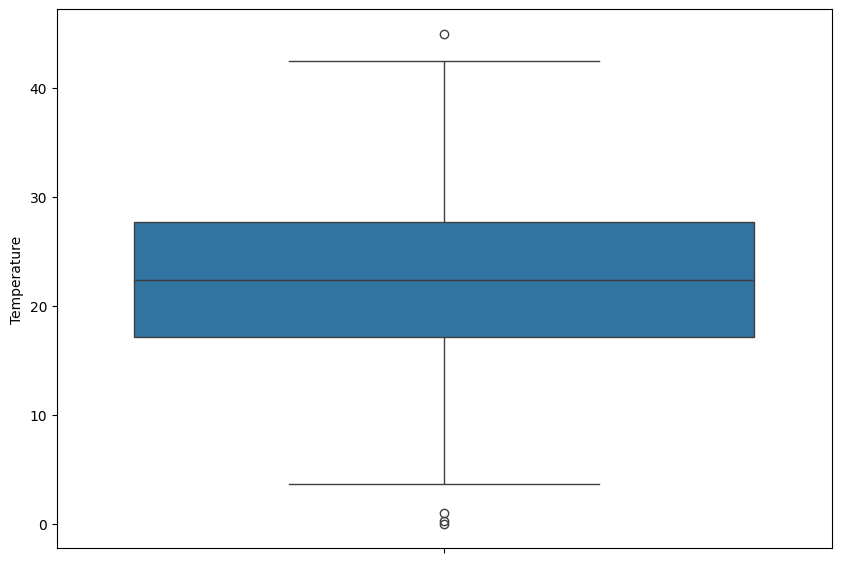

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data["Temperature"])
plt.show()

In [10]:
# Identify outliers for each column
outliers_info = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outlier_rows = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    proportion = len(outlier_rows) / len(data) * 100
    outliers_info[column] = {'rows': outlier_rows, 'proportion': proportion}

    print(f"Column: {column}")
    print(f"Outliers percentage: {proportion:.2f}%")

Column: Temperature
Outliers percentage: 0.80%
Column: Revenue
Outliers percentage: 0.60%


In [11]:
# Remove rows containing outliers
data_cleaned = data.copy()
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# Calculate overall data loss rate
loss_rate = (1 - len(data_cleaned) / len(data)) * 100
print(f"Overall data loss rate: {loss_rate:.2f}%")

Overall data loss rate: 0.80%


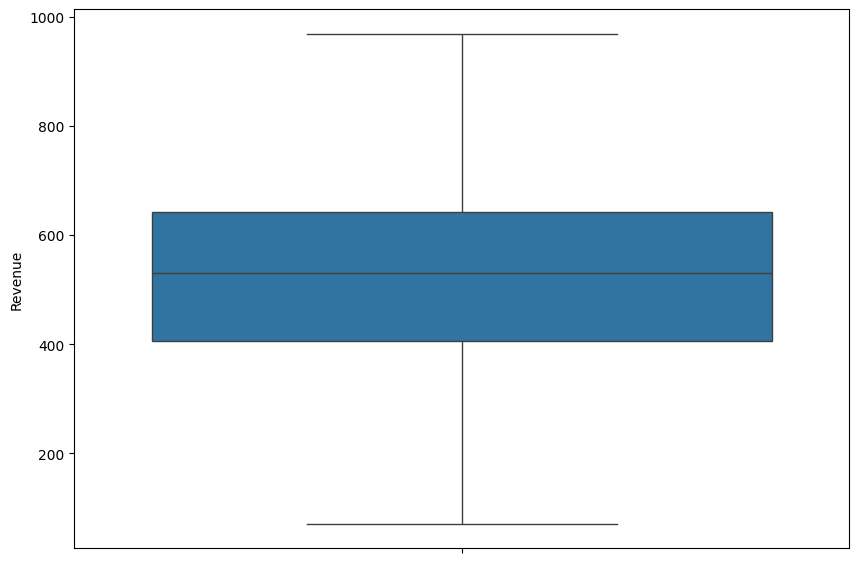

In [12]:
# Check for outliers again
plt.figure(figsize=(10,7))
sns.boxplot(data=data_cleaned["Revenue"])
plt.show()

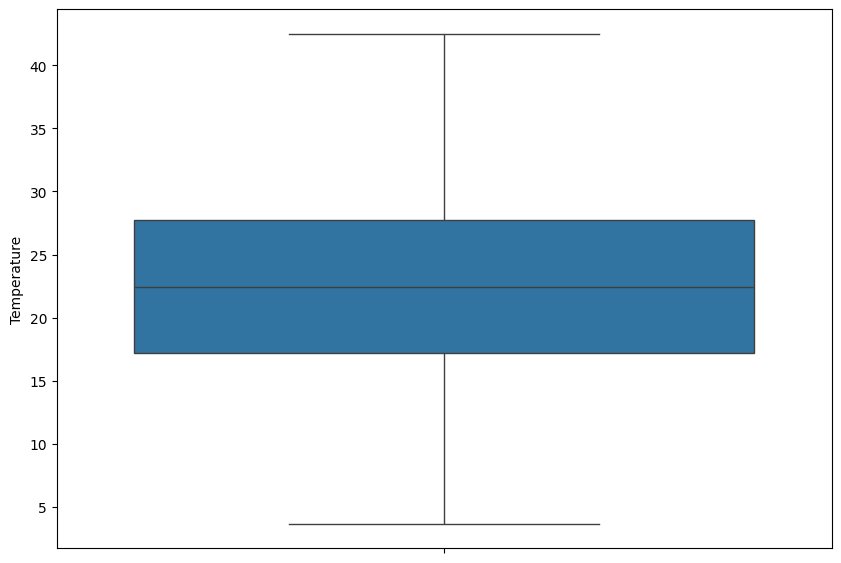

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data_cleaned["Temperature"])
plt.show()

In [14]:
data = data_cleaned

# Data visualization

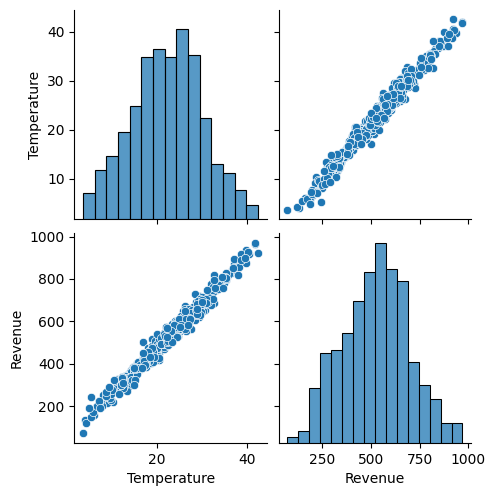

In [ ]:
# General overview
sns.pairplot(data)

<Axes: xlabel='Revenue', ylabel='Temperature'>

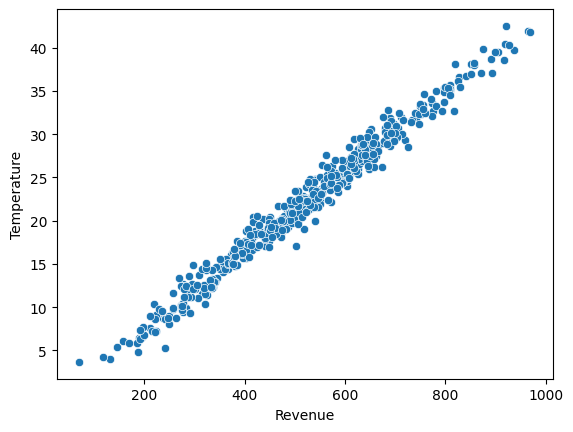

In [16]:
# Visualize the relationship
sns.scatterplot(data=data, x="Revenue", y="Temperature")

<Axes: xlabel='Revenue', ylabel='Temperature'>

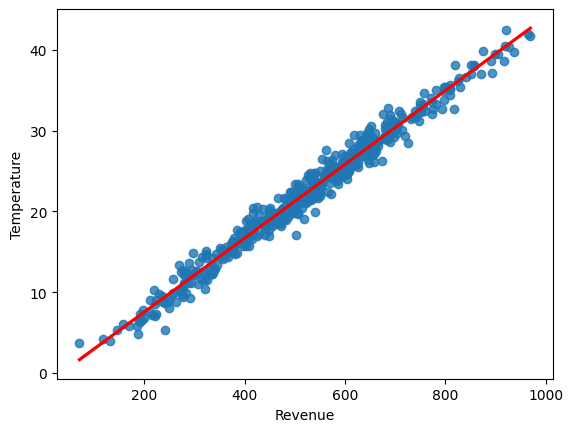

In [17]:
# Visualize the regression line
sns.regplot(data=data, x='Revenue', y="Temperature", line_kws={'color': 'red'})

# Regression model creation

In [ ]:
# Separate target and features
X = data.drop(["Revenue"], axis=1)
y = data[["Revenue"]]

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, shuffle=True)

In [20]:
# Import and train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on training set
y_predict = regressor.predict(X_train)
y_predict

array([[252.78868223],
       [694.5792461 ],
       [692.39520697],
       [521.41645523],
       [604.67378087],
       [234.40372466],
       [284.433829  ],
       [529.83815495],
       [587.82331878],
       [469.917956  ],
       [569.69539419],
       [191.33854621],
       [388.86869053],
       [450.1029887 ],
       [566.79401132],
       [650.40837039],
       [609.76668638],
       [539.4799034 ],
       [502.89143855],
       [160.6423378 ],
       [907.65554722],
       [509.76805462],
       [644.77653852],
       [730.34393519],
       [580.75084367],
       [392.50751718],
       [308.64348988],
       [574.87082582],
       [415.38628366],
       [798.98502473],
       [709.53433754],
       [559.00748237],
       [159.9820646 ],
       [391.5360063 ],
       [452.04350464],
       [524.88777123],
       [408.8188023 ],
       [339.44869723],
       [572.47981497],
       [367.67813647],
       [322.20520507],
       [250.77574373],
       [369.25504472],
       [543

Text(0.5, 1.0, 'Revenue generated vs temperature')

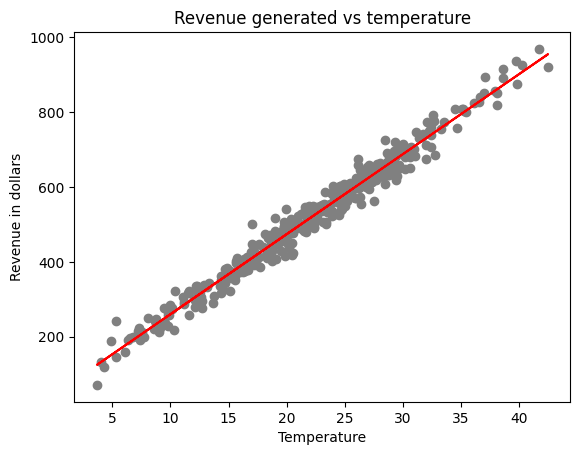

In [22]:
# Actual vs predicted data on training set
plt.scatter(X_train, y_train, color="gray")
plt.plot(X_train, y_predict, color='red')
plt.ylabel('Revenue in dollars')
plt.xlabel('Temperature')
plt.title('Revenue generated vs temperature')

In [23]:
# Evaluate model on training set
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y_train, y_predict)}\nR² SCORE: {r2_score(y_train, y_predict)}')

MSE: 643.3072172647247
R² SCORE: 0.9769250306791161


In [24]:
# Make predictions on test set
y_predictTest = regressor.predict(X_test)
y_predictTest

array([[467.92451195],
       [631.44897823],
       [198.43760342],
       [604.76145409],
       [727.93195498],
       [353.22304079],
       [524.34935953],
       [449.95758998],
       [420.83191192],
       [171.75270534],
       [238.69384862],
       [622.66429637],
       [265.4697762 ],
       [443.50048812],
       [474.22813465],
       [448.493447  ],
       [550.5981883 ],
       [791.36777731],
       [654.1201265 ],
       [519.86681989],
       [681.50818659],
       [291.32486026],
       [285.38339247],
       [364.19556507],
       [530.56070006],
       [807.78041826],
       [388.25706566],
       [911.29222162],
       [756.97536095],
       [368.08003383],
       [312.41998775],
       [838.30194827],
       [795.05859867],
       [474.95028345],
       [452.05010858],
       [361.32677185],
       [627.45631981],
       [756.6500534 ],
       [891.33617548],
       [423.85344102],
       [245.47886635],
       [330.77510994],
       [526.17882448],
       [749

Text(0.5, 1.0, 'Revenue generated vs temperature')

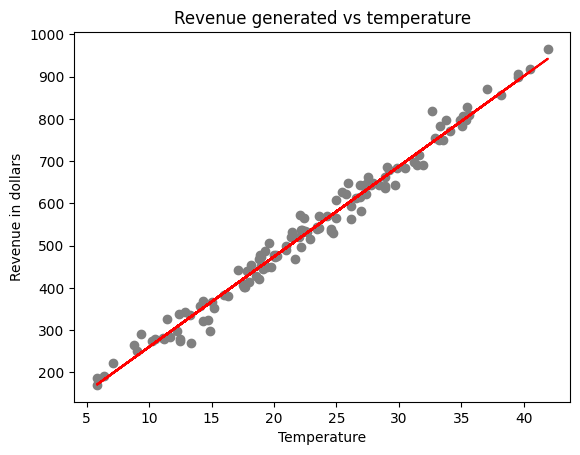

In [25]:
# Actual vs predicted data on test set
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_predictTest, color='red')
plt.ylabel('Revenue in dollars')
plt.xlabel('Temperature')
plt.title('Revenue generated vs temperature')

In [26]:
# Evaluate model on test set
print(f'MSE Test: {mean_squared_error(y_test, y_predictTest)}\nR² SCORE: {r2_score(y_test, y_predictTest)}')

MSE Test: 568.5882016760064
R² SCORE: 0.9824408149259038
